In [ ]:
import sys
sys.path.append('..')

from src.visualization import plot_settings

: 

In [1]:
def convert_usd_to_gbp_with_inflation(usd_2002_value):
    """
    Converts a USD value from 2002 to its equivalent GBP value in 2025,
    accounting for inflation and exchange rate.
    """
    # --- CPI Data (from BLS) ---
    cpi_2002 = 179.9
    cpi_may_2025 = 321.465 # Latest available CPI for 2025 at time of calculation

    # --- Exchange Rate (approximate as of July 2025) ---
    usd_to_gbp_exchange_rate = 0.73 # 1 USD = 0.73 GBP

    # Step 1: Adjust for inflation (2002 USD to 2025 USD)
    inflation_factor = cpi_may_2025 / cpi_2002
    usd_2025_value = usd_2002_value * inflation_factor

    # Step 2: Convert 2025 USD to 2025 GBP
    gbp_2025_value = usd_2025_value * usd_to_gbp_exchange_rate

    return gbp_2025_value

# Original USD values from the problem
original_usd_values = [2.00, 1.60, 3.85, 0.10]

print("Verifying USD 2002 to GBP 2025 conversion with inflation:")
for usd_val in original_usd_values:
    converted_gbp = convert_usd_to_gbp_with_inflation(usd_val)
    print(f"${usd_val:.2f} (2002 USD) -> £{converted_gbp:.2f} (2025 GBP)")

print("\nThese values should match the 'with inflation' results provided earlier.")

Verifying USD 2002 to GBP 2025 conversion with inflation:
$2.00 (2002 USD) -> £2.61 (2025 GBP)
$1.60 (2002 USD) -> £2.09 (2025 GBP)
$3.85 (2002 USD) -> £5.02 (2025 GBP)
$0.10 (2002 USD) -> £0.13 (2025 GBP)

These values should match the 'with inflation' results provided earlier.


<>:38: SyntaxWarning: invalid escape sequence '\D'
<>:38: SyntaxWarning: invalid escape sequence '\D'
C:\Users\garciaba\AppData\Local\Temp\ipykernel_35212\211143077.py:38: SyntaxWarning: invalid escape sequence '\D'
  plt.title('$\Delta$ P(destroy)')
p:\CodeProjects\Current\spaceprl-analysis\venv\Lib\site-packages\seaborn\matrix.py:262: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


0.2029993192097764


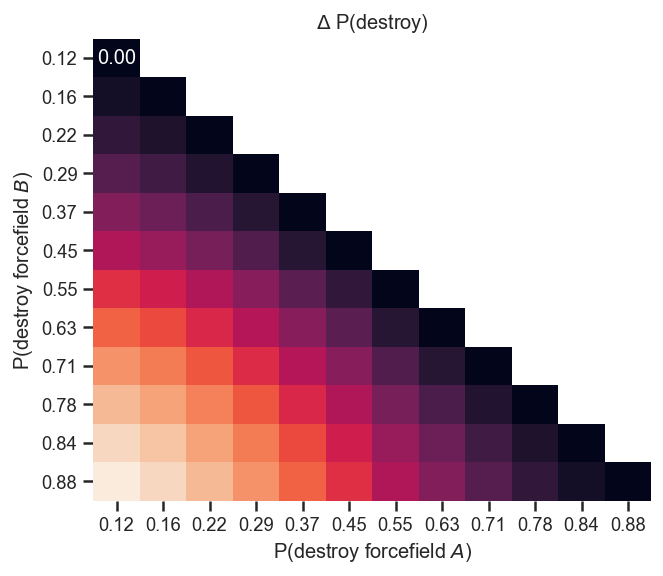

In [2]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

values = [0.07692308, 0.15384615, 0.23076923, 0.30769231,
          0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
          0.76923077, 0.84615385, 0.92307692]

slope = 2
# logistic function
logistic = lambda x: 1/(1+np.exp(-slope*x))

p = logistic(np.linspace(-1, 1, 12)).round(2)

# Compute all possible deltas as np matrix
all_deltas = np.empty((len(p), len(p)))
for i in range(len(p)):
    for j in range(len(p)):
        all_deltas[i, j] = abs(p[j] - p[i])

# plot deltas in heattmap 
# set x and y using values as labels
# hide half of the heatmap
mask = np.zeros_like(all_deltas)
mask[np.triu_indices_from(mask)] = True
# but keep matrix diagonal
mask[np.diag_indices_from(mask)] = False
sns.heatmap(np.array(all_deltas), cbar=False, xticklabels=p, yticklabels=p, annot=True, fmt='.2f', mask=mask)
# sns.heatmap(np.array(all_deltas), cmap='RdBu_r', cbar=False, xticklabels=p, yticklabels=p, annot=True, fmt='.2f')
# Sort deltas in descending order
# sorted_deltas = sorted(all_deltas, reverse=True)
# print("All Deltas:")
# for delta in all_deltas:
    # print(delta)
# ylabel 45 degree rotation
plt.yticks(rotation=0)
plt.title('$\Delta$ P(destroy)')
plt.xlabel('P(destroy forcefield $A$)')
plt.ylabel('P(destroy forcefield $B$)')
all_deltas = np.array(all_deltas).flatten()
print(np.std((all_deltas)[all_deltas != 0]))


* New pairs (to update)

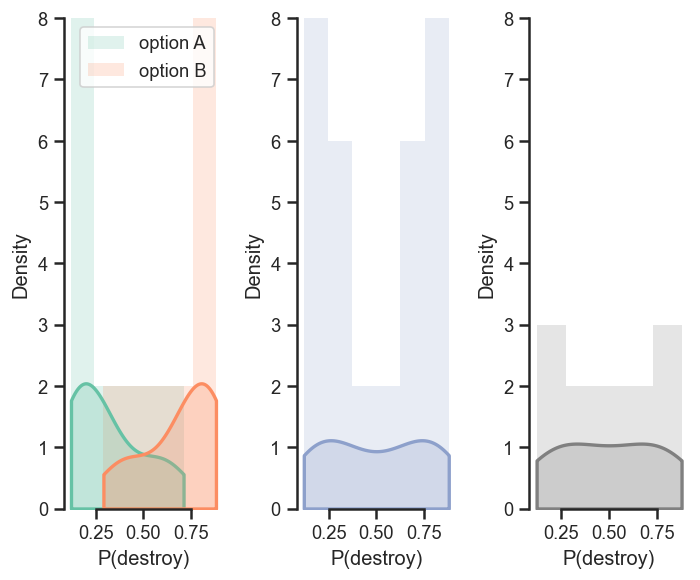

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.visualization.plot_settings



x = [(0.16, 0.29),
 (0.71, 0.84),
 (0.22, 0.37),
 (0.63, 0.78),
 (0.55, 0.78),
 (0.22, 0.45),
 (0.37, 0.63),
 (0.55, 0.88),
 (0.12, 0.45),
 (0.29, 0.71),
 (0.16, 0.63),
 (0.37, 0.84),
 (0.12, 0.71),
 (0.29, 0.88),
 (0.16, 0.84),
 (0.12, 0.88)]


x = np.array(x)

# plot hist of x

plt.subplot(1, 3, 1)
sns.histplot(x[:,0],label='option A', color='C0', edgecolor='none', alpha=.2)
sns.histplot(x[:,1], label='option B', color='C1', edgecolor='none', alpha=.2)
sns.kdeplot(x[:,0], color='C0', lw=2, fill=True, alpha=0.25, cut=0)
sns.kdeplot(x[:,1], color='C1', lw=2, fill=True, alpha=0.25, cut=0)
plt.ylabel('Density')
plt.ylim(0, 8)
plt.legend()
sns.despine(trim=True)
plt.xlabel('P(destroy)')

plt.subplot(1, 3, 3)
sns.kdeplot(np.unique(x.flatten()), color='grey', lw=2, fill=True, alpha=0.25, cut=0)
sns.histplot(np.unique(x.flatten()), label='original dist', color='grey', edgecolor='none', alpha=.20)
plt.ylim(0, 8)
sns.despine(trim=True)
plt.xlabel('P(destroy)')

plt.subplot(1, 3, 2)
sns.kdeplot(x.flatten(), color='C2', lw=2, fill=True, alpha=0.25, cut=0)
sns.histplot(x.flatten(), label='pooled', color='C2', edgecolor='none', alpha=.20)
sns.despine(trim=True)
plt.ylim(0, 8)
plt.xlabel('P(destroy)')
plt.tight_layout()

In [2]:
%pip install matplotlib_venn

     ---------------------------------------- 40.8/40.8 KB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45439 sha256=469dfa565d35e19692a28e3434a8588fd2c33f30e474730b43fda986b7db2d05
  Stored in directory: c:\users\garciaba\appdata\local\pip\cache\wheels\86\29\d8\0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\garciaba\.pyenv\pyenv-win\versions\3.9.12\python.exe -m pip install --upgrade pip' command.


TypeError: unsupported operand type(s) for -: 'list' and 'list'

([<matplotlib.axis.XTick at 0x21b03e3ee10>,
 [Text(0, 0, 'paired A'),
  Text(1, 0, 'paired B'),
  Text(2, 0, 'paired (pooled)'),
  Text(3, 0, 'original')])

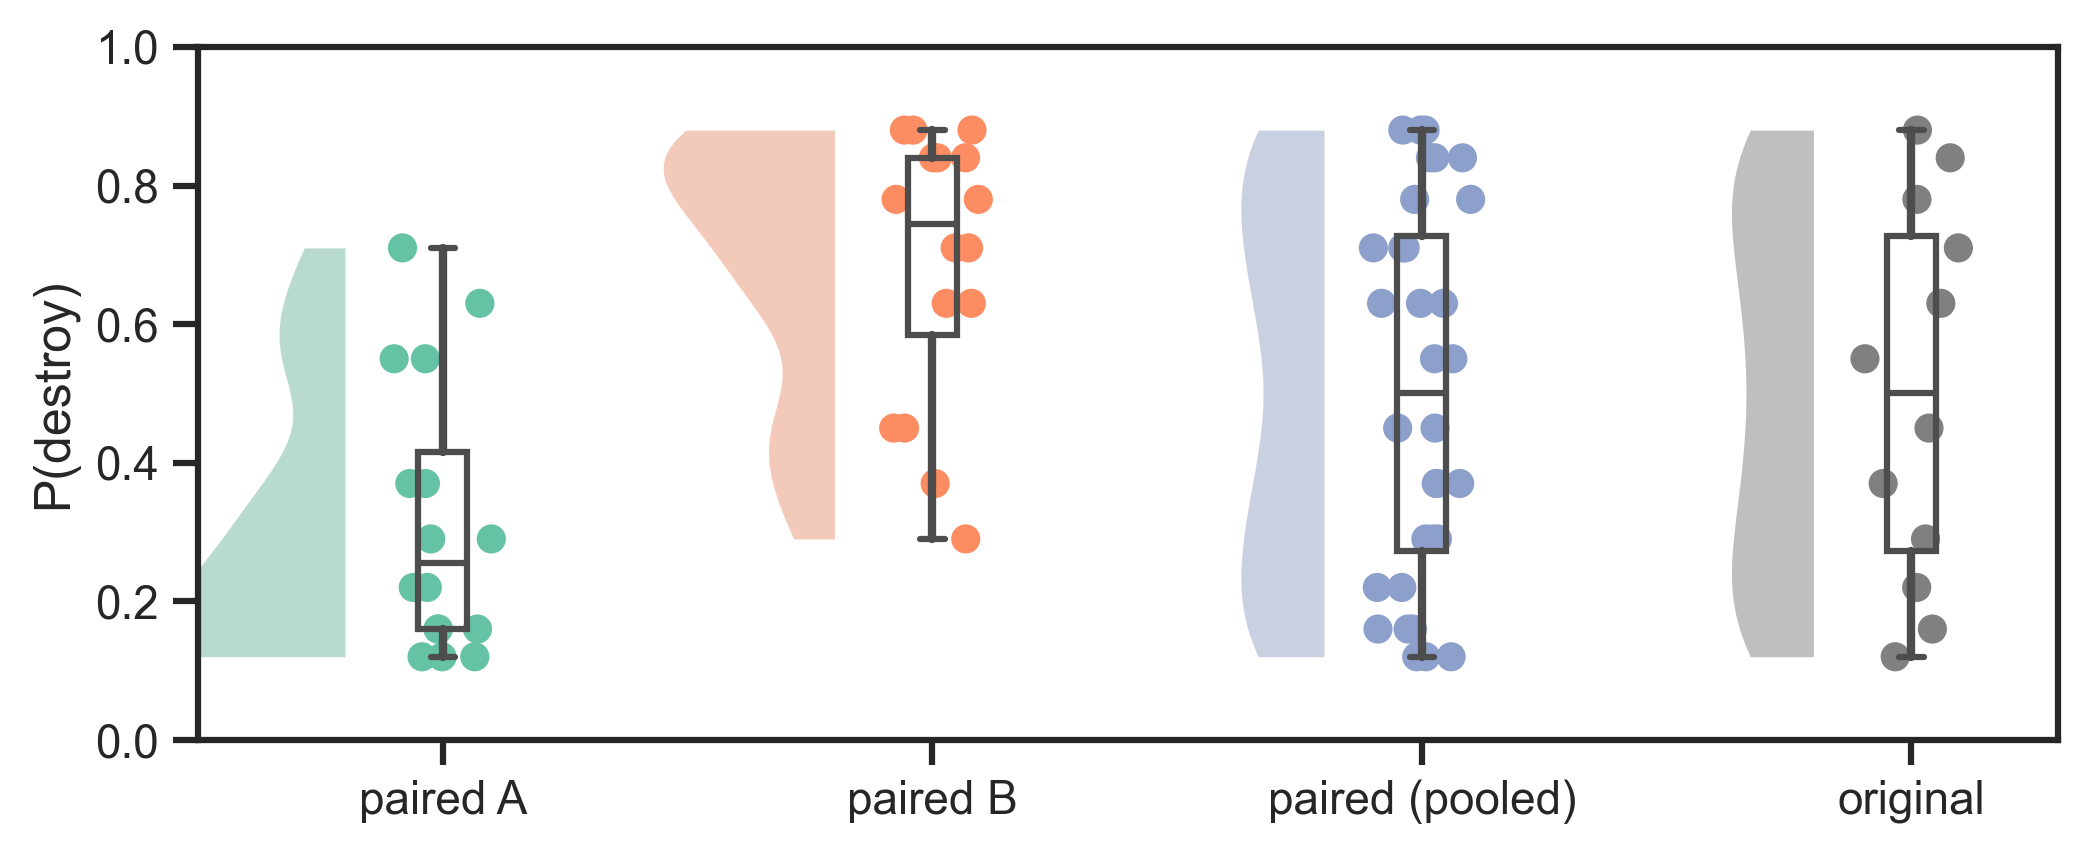

In [6]:
from ptitprince import PtitPrince as pt
sns.set_style('ticks')
plt.figure(figsize=(8,3), dpi=300)
pt.RainCloud(data=[x[:, 0], x[:, 1], x.flatten(), np.unique(x.flatten())], width_viol=.7, 
             width_box=.1, dodge=True,  bw=.4,  alpha=0.5, linewidth=0, point_size=7, palette=['C0', 'C1', 'C2', 'grey'])
plt.ylim(0, 1)
plt.ylabel('P(destroy)')
plt.xlabel('')
plt.xticks([0, 1, 2, 3], ['paired A', 'paired B', 'paired (pooled)', 'original'])

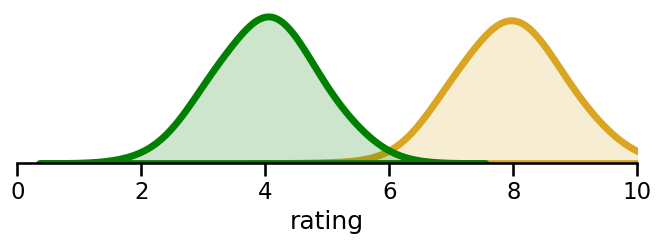

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data from a Gaussian distribution
mean = 8
std = .8
data = np.random.normal(mean, std, 1000)

# increase x-axis width
plt.rcParams['font.size'] = 14  # or use 'axes.labelsize', 'xtick.labelsize', etc.
plt.rcParams['figure.figsize'] = (8, 2)  # width, height in inches

# Create KDE plot
sns.set_context('talk')
sns.kdeplot(data, fill=True, alpha=0.2, linewidth=5, color='goldenrod', bw_adjust=2)

mean = 4
std = .8
data = np.random.normal(mean, std, 1000)
sns.kdeplot(data, fill=True, alpha=0.2, linewidth=5, color='green', bw_adjust=2)

plt.xlabel('rating')
sns.despine(left=True, bottom=False)
plt.yticks([])
plt.xlim(0,10)
plt.ylabel('')
plt.show()

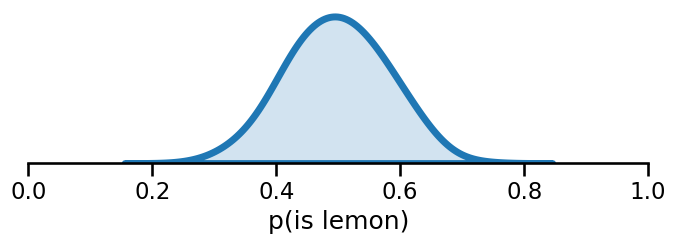

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate data from a Gaussian distribution
mean = .5
std = .08
data = np.random.normal(mean, std, 1000)

# increase x-axis width
plt.rcParams['font.size'] = 14  # or use 'axes.labelsize', 'xtick.labelsize', etc.
plt.rcParams['figure.figsize'] = (8, 2)  # width, height in inches

# Create KDE plot
sns.set_context('talk')
sns.kdeplot(data, fill=True, alpha=0.2, linewidth=5, color='C0', bw_adjust=2)



plt.xlabel('p(is lemon)')
sns.despine(left=True, bottom=False)
plt.yticks([])
plt.xlim(0,1)
plt.ylabel('')
plt.show()

Text(0, 0.5, '')

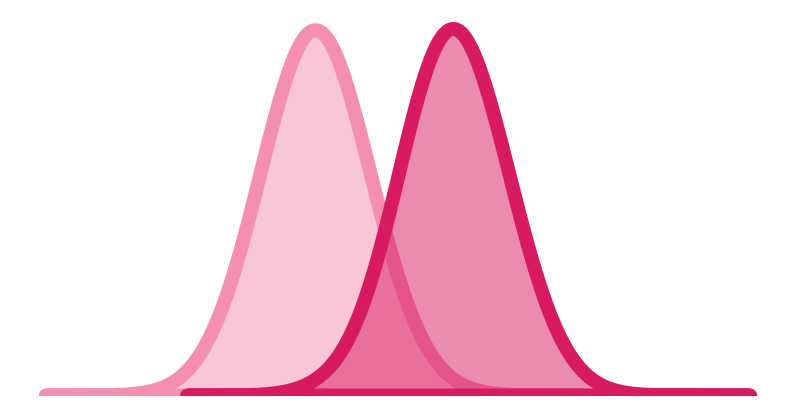

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Setup the data
# We generate two normal distributions.
# 'loc' changes the position (mean), 'scale' changes the width (std dev).
np.random.seed(42) # For reproducibility
data_left = np.random.normal(loc=0, scale=3.5, size=10000)
data_right = np.random.normal(loc=10, scale=3.5, size=10000)

# 2. Create the figure
plt.figure(figsize=(10, 5))

# 3. Plot the curves using Seaborn's kdeplot
# Left Curve (Lighter Pink)
sns.kdeplot(
    data_left, 
    color="#F48FB1",  # Light pink hex code
    fill=True,        # Fills the area under the curve
    alpha=0.5,        # Transparency (0 to 1)
    linewidth=10,       # Thickness of the outline
    bw_adjust=3.5,
        # Smoothing parameter
)

# Right Curve (Darker Magenta)
sns.kdeplot(
    data_right, 
    color="#D81B60",  # Deep magenta hex code
    fill=True, 
    alpha=0.5, 
    linewidth=10,
    bw_adjust=3.5
)

# 4. Styling to match the image
# Remove the box frame and axis labels for that clean look
sns.despine(left=True, bottom=True) # Keep bottom line (spine) like the image
plt.yticks([]) # Hide Y-axis numbers
plt.xticks([]) # Hide X-axis numbers
plt.xlabel('') # Remove X-axis label
plt.ylabel('') # Remove Y-axis label

# Optional: Add a flat baseline if the bottom spine isn't enough
# plt.axhline(0, color='gray', linewidth=2) 
